# <font face=Cambria>Lab 1: Descriptive enhancement analysis using python 


In [16]:
#导入数据分析包
import pandas as pd
#导入互联网数据获取包
from pandas_datareader import data
#导入可视化包
import matplotlib.pyplot as plt
#下句代表：网页内命令行之间内嵌绘图。
#Jupyter notebook内置的魔法函数，用%开头，如果写了下面这句，就不用写plt.show()了。
%matplotlib inline


In [37]:
# 定义字典，存储物价白酒公司股票得键值对（key:value)
wine_dict= {'贵州茅台':'600519.ss', '五粮液':'000858.sz', '洋河股份':'002304.sz', '泸州老窖':'000568.sz', '口子窖':'603589.ss'}
# 定义起始日期
startdate_str='2017-01-01'
enddate_str='2022-01-01'
# 将pipi中得键（5家公司得名字）单独装入一个列表
winename_list=['贵州茅台', '五粮液', '洋河股份', '泸州老窖', '口子窖']

In [38]:
#读取贵州茅台数据
gzmtdata_df = data.get_data_yahoo(wine_dict['贵州茅台'], startdate_str, enddate_str)
#读取五粮液数据
wlydata_df = data.get_data_yahoo(wine_dict['五粮液'], startdate_str, enddate_str)
#读取洋河股份数据
yhgfdata_df = data.get_data_yahoo(wine_dict['洋河股份'], startdate_str, enddate_str)
#读取泸州老窖数据
lzljdata_df = data.get_data_yahoo(wine_dict['泸州老窖'], startdate_str, enddate_str)
#读取口子窖数据
kzjdata_df = data.get_data_yahoo(wine_dict['口子窖'], startdate_str, enddate_str)
#定义一个列表，存储5家白酒公司股票数据框dataframe
winedata_list = [gzmtdata_df, wlydata_df, yhgfdata_df, lzljdata_df, kzjdata_df]
#查看股票数据框大小
for df in winedata_list:
      print(df.shape)

(1215, 6)
(1215, 6)
(1215, 6)
(1215, 6)
(1215, 6)


In [39]:
#定义函数 round2(),把数据规整
def round2(dataframe):
      #计算数据框的行数
      row=dataframe.shape[0]
      #计算数据框的列数
      col=dataframe.shape[1]
      #循环遍历每一行
      for i in range(row):
            #循环遍历每一列，最后一列为交易量不需要小数
            for j in range (col-1):
                  dataframe.iloc[i,j]=round(dataframe.iloc[i,j],2)
      return dataframe
for i in range(len(winedata_list)):
      winedata_list[i]=round2(winedata_list[i])
winedata_list[0].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,337.00,332.81,334.28,334.56,2076389.0,310.228424
2017-01-04,352.17,334.60,334.62,351.91,6525738.0,326.316620
2017-01-05,351.45,345.44,350.00,346.74,4170448.0,321.522644
2017-01-06,359.78,346.10,346.64,350.76,6809562.0,325.250244
2017-01-09,352.88,346.54,347.80,348.51,3540500.0,323.163879


In [40]:
for i in range(len(winedata_list)):
      print(winedata_list[i].describe())
import seaborn as sns


              High          Low         Open        Close        Volume  \
count  1215.000000  1215.000000  1215.000000  1215.000000  1.215000e+03   
mean   1128.522708  1099.310790  1112.793325  1114.589235  3.989845e+06   
std     580.455408   563.044324   571.414851   571.868195  1.901745e+06   
min     337.000000   332.810000   334.280000   334.560000  0.000000e+00   
25%     671.625000   650.790000   660.000000   662.835000  2.760538e+06   
50%     977.000000   951.220000   962.300000   965.030000  3.526136e+06   
75%    1703.400000  1656.880000  1674.500000  1676.000000  4.706028e+06   
max    2627.880000  2485.000000  2587.980000  2601.000000  2.043967e+07   

         Adj Close  
count  1215.000000  
mean   1081.010526  
std     571.543672  
min     310.228424  
25%     628.285004  
50%     931.992310  
75%    1646.899292  
max    2549.222412  
              High          Low         Open        Close        Volume  \
count  1215.000000  1215.000000  1215.000000  1215.000000  1

In [41]:
for i in range(len(winedata_list)):
      print(winedata_list[i].max())

High         2.627880e+03
Low          2.485000e+03
Open         2.587980e+03
Close        2.601000e+03
Volume       2.043967e+07
Adj Close    2.549222e+03
dtype: float64
High         3.571900e+02
Low          3.325000e+02
Open         3.544900e+02
Close        3.444000e+02
Volume       7.850285e+07
Adj Close    3.359422e+02
dtype: float64
High         2.686000e+02
Low          2.495000e+02
Open         2.610000e+02
Close        2.637000e+02
Volume       3.014092e+07
Adj Close    2.552251e+02
dtype: float64
High         3.276600e+02
Low          2.971100e+02
Open         3.249900e+02
Close        3.139900e+02
Volume       4.599138e+07
Adj Close    3.057696e+02
dtype: float64
High         8.649000e+01
Low          8.233000e+01
Open         8.400000e+01
Close        8.392000e+01
Volume       4.884942e+07
Adj Close    8.169006e+01
dtype: float64


In [42]:
# 股票涨跌幅
'''
定义一个求股票涨跌幅的函数RF_rate()
该函数原理：涨跌幅=（（卖出价格-买入价格）/买入价格）* 100
'''
def RF_rate(stock_df):
      #股票数据的close列
      stock_close_series=stock_df['Close']
      #指定买入价和卖出价
      stock_buy = stock_close_series[0]
      stock_sell=stock_close_series[-1]
      #求涨跌幅
      RF_rate=(stock_sell-stock_buy)/stock_buy*100
      return RF_rate
#创建一个key为股票名称，value为股票数据的字典
stock_ND_dict={}
for i in range (len(winename_list)):
      stock_ND_dict[winename_list[i]]=winedata_list[i]
#计算涨跌幅
for key, value in stock_ND_dict.items():
      if RF_rate(value)<0:
            print('%s' % key, '\b跌幅为：%3.2f%%' % RF_rate(value))
      elif RF_rate(value)>0:
        print('%s' % key, '\b涨幅为：%3.2f%%' % RF_rate(value))
      else:
        print('%s' % key, '\b涨幅为：%3.2f%%' % RF_rate(value))

贵州茅台涨幅为：512.75%
五粮液涨幅为：542.41%
洋河股份涨幅为：132.51%
泸州老窖涨幅为：664.67%
口子窖涨幅为：119.82%


Text(0, 0.5, '股价')

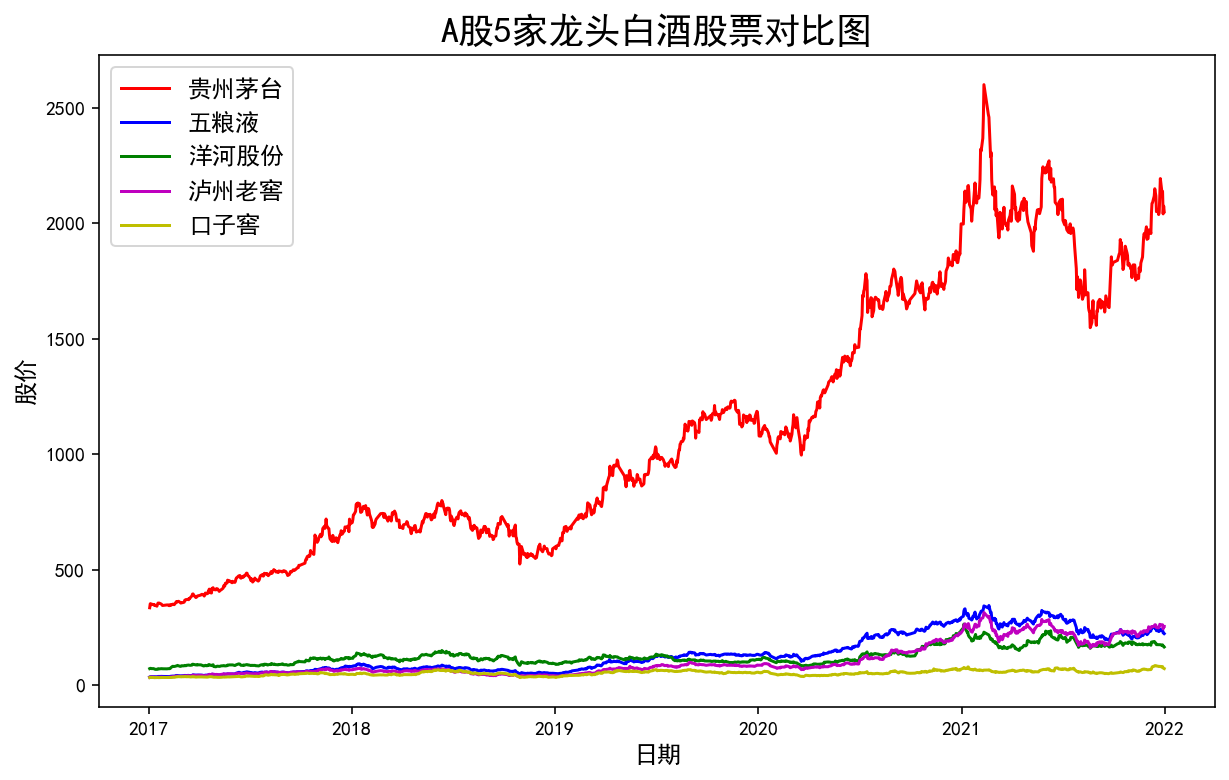

In [44]:
from pylab import mpl 
mpl.rcParams['font.sans-serif'] = ['SimHei']
#设置图片大小
plt.figure(figsize=(10,6))
#分别绘制5个折线
plt.plot(gzmtdata_df['Close'], c='r', label='贵州茅台')
plt.plot(wlydata_df['Close'], c='b', label='五粮液')
plt.plot(yhgfdata_df['Close'], c='g', label='洋河股份')
plt.plot(lzljdata_df['Close'], c='m', label='泸州老窖')
plt.plot(kzjdata_df['Close'], c='y', label='口子窖')
#标题、图例、坐标轴标签
plt.title('A股5家龙头白酒股票对比图', fontsize=18)
plt.legend(loc='upper left', fontsize=12)
plt.xlabel('日期', fontsize=12)
plt.ylabel('股价', fontsize=12) 